In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# # Create a practice set of random latitude and longitude combinations.
# lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
# lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
# lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# # Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
# #    print(coordinate[0], coordinate[1])

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [7]:
# # Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities

607

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#print(weather_api_key)

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [11]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jaitaran
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | linqing
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | balma
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | balaquid
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | labutta
City not found. Skipping...
Processing Record 18 of Set 1 | tongliao
Processing Record 19 of Set 1 | singapore
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 | ke

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jaitaran,26.2031,73.9364,81.81,77,95,14.20,IN,2022-07-28 03:42:31
1,Puerto Ayora,-0.7393,-90.3518,69.55,96,98,10.00,EC,2022-07-28 03:42:32
2,Vaini,-21.2000,-175.2000,78.96,83,20,10.36,TO,2022-07-28 03:41:45
3,Linqing,36.8456,115.7117,75.60,90,100,8.93,CN,2022-07-28 03:42:32
4,Khatanga,71.9667,102.5000,72.39,45,94,4.09,RU,2022-07-28 03:42:32
5,Sitka,57.0531,-135.3300,60.69,72,100,5.75,US,2022-07-28 03:42:33
6,Pacific Grove,36.6177,-121.9166,64.24,87,40,3.44,US,2022-07-28 03:41:24
7,Rikitea,-23.1203,-134.9692,74.03,67,100,17.85,PF,2022-07-28 03:42:33
8,Norman Wells,65.2820,-126.8329,64.44,55,75,3.44,CA,2022-07-28 03:42:34
9,Balma,43.6111,1.4994,64.31,68,0,11.50,FR,2022-07-28 03:42:34


In [18]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity',
'Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(5)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jaitaran,IN,2022-07-28 03:42:31,26.2031,73.9364,81.81,77,95,14.20
1,Puerto Ayora,EC,2022-07-28 03:42:32,-0.7393,-90.3518,69.55,96,98,10.00
2,Vaini,TO,2022-07-28 03:41:45,-21.2000,-175.2000,78.96,83,20,10.36
3,Linqing,CN,2022-07-28 03:42:32,36.8456,115.7117,75.60,90,100,8.93
4,Khatanga,RU,2022-07-28 03:42:32,71.9667,102.5000,72.39,45,94,4.09


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

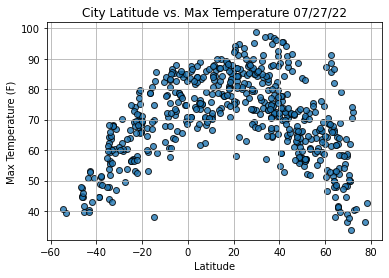

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

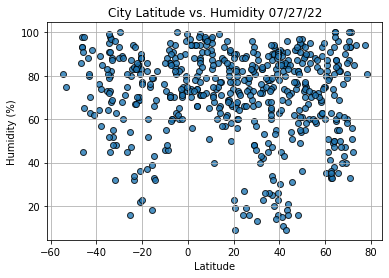

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

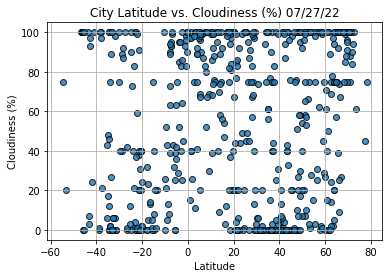

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

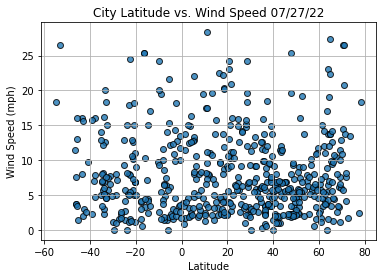

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()